*Χρησιμοποίησα **3** Free Pass*

---
<span style="font-size: 28px;">**Ερώτηση 2**</span>

---
<span style="font-size: 20px;">**Φόρτωση δεδομένων**</span>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


data = pd.read_csv('cell_phone_ratings.csv')

print(data)

           reviewerID        asin  overall
0       AJMBX04BZWPSD  B0000SX3BK        1
1       AJMBX04BZWPSD  B0000SX3BK        1
2       AGZ8HQO485IL8  B0000SX3BK        3
3       AGZ8HQO485IL8  B0000SX3BK        3
4      A38V5H082VI1H4  B0000SX3BK        4
...               ...         ...      ...
47989  A233H7F8EJIX1F  B00ONSC81E        5
47990   A10WMKOL27VEI  B00ONSC81E        5
47991  A1TP2RW7KDI5AZ  B00ONSC81E        5
47992  A3KK47W2XBVVUJ  B00ONSC81E        5
47993  A1W8X41DAROPQ6  B00ONSC81E        5

[47994 rows x 3 columns]


---
<span style="font-size: 25px;">**Βήμα 1**</span>

In [2]:
# Επαναληπτικό κλάδεμα για την επεξεργασία των δεδομένων
while True:
    # Καταμέτρηση του αριθμού βαθμολογιών ανά χρήστη και ανά κινητό
    user_counts = data['reviewerID'].value_counts()
    item_counts = data['asin'].value_counts()

    # Φιλτράρισμα χρηστών και κινητών που δεν ικανοποιούν την συνθήκη
    filtered_users = user_counts[user_counts > 5].index
    filtered_items = item_counts[item_counts > 5].index

    filtered_data = data[(data['reviewerID'].isin(filtered_users)) & (data['asin'].isin(filtered_items))]
    #print(filtered_data)

    new_user_counts = filtered_data['reviewerID'].value_counts()
    new_item_counts = filtered_data['asin'].value_counts()
    #print(new_user_counts)
    #print(new_item_counts)

    # Αν το τελευαταίο στοιχείο της καταμέτρησης των χρηστών και των κινητών στα καινούργια μας data είναι περισσότερα από 5
    if new_user_counts.iloc[-1] > 5 and new_item_counts.iloc[-1] > 5:
        # Τότε θα σταματήσουμε την επανάληψη
        break
    else:
        # Αλλιώς θέτουμε στο παλιό μας data, τα καινούργια μας προσωρινά data
        data = filtered_data

In [3]:
print(filtered_data)
print(filtered_data['reviewerID'].value_counts())
print(filtered_data['asin'].value_counts())

           reviewerID        asin  overall
887     ASK11J3ZXE42J  B0016JDBYG        2
893    A39Y702EFQOVNG  B0016JDBYG        5
911     AHIY1S8OE0JAE  B0016JDBYG        3
961     ASK11J3ZXE42J  B0016JDBYG        2
967    A39Y702EFQOVNG  B0016JDBYG        5
...               ...         ...      ...
46962  A2R6U7WLNVSIJL  B01F57V826        5
46977  A3UHUP814K2GVU  B01F57V826        5
46982  A2RJB9YB8059OJ  B01F57V826        4
47007  A214JQI91IH3S1  B01F57V826        5
47010  A1QPLMB8S5KZDD  B01F57V826        5

[2969 rows x 3 columns]
reviewerID
A1RNVKFD1PF1QF    21
ABIWW6V0V01L6     20
AJSDV5OVPZ7Y3     19
A3U1J3Z55AFZZO    17
AUGGOB99VRU6U     16
                  ..
A3VJ27IYOG4BDB     6
AVSJ4U3W2V0SP      6
A1HJSE311DIDRK     6
A2N47GVERJ9HY1     6
A2R6U7WLNVSIJL     6
Name: count, Length: 389, dtype: int64
asin
B00GXHPN1U    136
B00A29WCA0    122
B00DRNEV9S     81
B00LLP508U     69
B00I2LRLPG     56
             ... 
B00IV5C0T0      6
B00IVI3H2Q      6
B00J99NFZK      6
B00KCTWUIE 

---
**εδώ παρακάτω φαίνεται η απόδειξη ότι έχει γίνει σωστά το κλάδεμα, αφού το συγκρίνουμε με τα σωστά αποτελέσματα που μας έχουν δωθεί από το αρχείο *cell_phone_ratings_pruned.csv***

In [4]:
pruned_data = pd.read_csv('cell_phone_ratings_pruned.csv')

print(pruned_data)
print(pruned_data['reviewerID'].value_counts())
print(pruned_data['asin'].value_counts())

          reviewerID        asin  overall
0      ASK11J3ZXE42J  B0016JDBYG        2
1     A39Y702EFQOVNG  B0016JDBYG        5
2      AHIY1S8OE0JAE  B0016JDBYG        3
3      ASK11J3ZXE42J  B0016JDBYG        2
4     A39Y702EFQOVNG  B0016JDBYG        5
...              ...         ...      ...
2964  A2R6U7WLNVSIJL  B01F57V826        5
2965  A3UHUP814K2GVU  B01F57V826        5
2966  A2RJB9YB8059OJ  B01F57V826        4
2967  A214JQI91IH3S1  B01F57V826        5
2968  A1QPLMB8S5KZDD  B01F57V826        5

[2969 rows x 3 columns]
reviewerID
A1RNVKFD1PF1QF    21
ABIWW6V0V01L6     20
AJSDV5OVPZ7Y3     19
A3U1J3Z55AFZZO    17
AUGGOB99VRU6U     16
                  ..
A3VJ27IYOG4BDB     6
AVSJ4U3W2V0SP      6
A1HJSE311DIDRK     6
A2N47GVERJ9HY1     6
A2R6U7WLNVSIJL     6
Name: count, Length: 389, dtype: int64
asin
B00GXHPN1U    136
B00A29WCA0    122
B00DRNEV9S     81
B00LLP508U     69
B00I2LRLPG     56
             ... 
B00IV5C0T0      6
B00IVI3H2Q      6
B00J99NFZK      6
B00KCTWUIE      6
B00F3

In [5]:
filtered_data_reset = filtered_data.reset_index(drop=True)
are_equal = filtered_data_reset.equals(pruned_data)
print(are_equal)

True


---
**εδώ φτιάχνουμε το train και το test set**

In [6]:
# Τυχαία επιλογή 10% του test set
test_size = round(0.1 * len(filtered_data))
test_indices = np.random.choice(filtered_data.index, size=test_size, replace=False)

# Δημιουργία των δικών μου train και test sets
train_data_mine = filtered_data.drop(test_indices)
test_data_mine = filtered_data.loc[test_indices]

print(train_data_mine)
print(test_data_mine)

           reviewerID        asin  overall
887     ASK11J3ZXE42J  B0016JDBYG        2
893    A39Y702EFQOVNG  B0016JDBYG        5
911     AHIY1S8OE0JAE  B0016JDBYG        3
961     ASK11J3ZXE42J  B0016JDBYG        2
967    A39Y702EFQOVNG  B0016JDBYG        5
...               ...         ...      ...
46960  A242ADDCE3YB3U  B01F57V826        1
46977  A3UHUP814K2GVU  B01F57V826        5
46982  A2RJB9YB8059OJ  B01F57V826        4
47007  A214JQI91IH3S1  B01F57V826        5
47010  A1QPLMB8S5KZDD  B01F57V826        5

[2672 rows x 3 columns]
           reviewerID        asin  overall
1885   A1601RU0RU6L9N  B001V7RK8G        5
2390    ATWDCYVND935I  B0034THXTK        5
21443  A2U44VA0G6MNOI  B00GP6TEYQ        5
29087   AYYOB060VR9GM  B00LUZ8XFS        5
6511    AX4PXKR06TGLP  B005LSS3L4        5
...               ...         ...      ...
22271   AMOLUSI1RUF0B  B00GXHPN1U        5
11899   AF54V9D0YCQ2I  B00A29WCA0        5
46529  A1U05R25DGZ2L1  B01EYT1URO        5
8527   A3O3V7DXDN2EQH  B0078L

**όμως για λόγους ευκολίας στην διόρθωση, μας ζητείται να χρησιμοποιήσουμε τα έτοιμα αρχεία train.csv και test.csv**</br>
άρα από εδώ και πέρα θα χρησιμοποιούμε αυτά:

In [7]:
train_data = pd.read_csv('ratings_train.csv')
test_data = pd.read_csv('ratings_test.csv')

print(train_data)
print(test_data)

          reviewerID        asin  overall
0     A1KHGZDTNXCOW9  B0085EIE38        5
1      ATWDCYVND935I  B001F7VN6M        5
2      AO84KHY4RD89J  B00F3J4B5S        5
3     A2F2KL35PTQ8BS  B00LUZ8XFS        1
4     A1GNL6V10GUU3B  B008MC3N34        5
...              ...         ...      ...
2667  A2V36ZOEXQV8UM  B00INEIZN4        5
2668  A1M9J5T8PRI2H8  B00COZIZ10        5
2669  A16OQXVU832Q66  B004748YPS        5
2670   AP0HMWC3KIUN0  B00FJBFTDS        5
2671    A908CRZDXABQ  B00F64LD4W        4

[2672 rows x 3 columns]
         reviewerID        asin  overall
0     ADKRA9ZAFYRVW  B00JK3DX8Y        5
1    A3UHUP814K2GVU  B00C1DIGRI        5
2    A3477O7Y026ARP  B00AKG2XSQ        5
3    A1L08O60MXPCYA  B0034TZONM        5
4     A2EMA184DPM05  B001F7VN6M        5
..              ...         ...      ...
292  A2KJX3K63I3K0U  B00F64LD4W        5
293  A23DH5K5KDCJCK  B00LLP508U        5
294   AIH05X9KBQWX4  B00915VL58        3
295  A3VJ27IYOG4BDB  B00GXHPN1U        5
296  A2HDF4JWLGDYHP 

---
**εδώ υλοποιούμε την συνάρτηση για τον υπολογισμό του error**</br>
είτε μπορούμε με έτοιμη συνάρτηση, είτε χρησιμοποιόντας τον τύπο

In [8]:
def calculate_rmse(actual_ratings, predicted_ratings):
    rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    
    # OR
    
    #n = len(actual_ratings)
    #rmse = np.sqrt(np.sum((actual_ratings - predicted_ratings) ** 2) / n)
    
    return rmse

---
<span style="font-size: 25px;">**Βήμα 2**</span>

**Αυτό δεν είναι αναγκαίο να ελεγχθεί αλλά ήθελα να δω αν οι χρήστες και τα κινητά που είναι στο train περιέχονται κάποια από αυτά και στο test(θέλω στο test να έχουμε χρήστες και κινητά που να είναι καπου και στο train, *δεν με ενδιαφέρει να έχω το ίδιο ζευγάρι*)(και βλέπουμε ότι αυτό αληθεύει άρα θα μπορώ να κάνω κάποιες συμβάσεις αργότερα)**

In [9]:
# Check if all values in column 'reviewerID' of test_data are in column 'reviewerID' of train_data
is_in_train_data = test_data['reviewerID'].isin(train_data['reviewerID']).all()
print(is_in_train_data)

is_in_train_data = test_data['asin'].isin(train_data['asin']).all()
print(is_in_train_data)

True
True


In [10]:
# Υπολογισμός User Average
user_avg_ratings = train_data.groupby('reviewerID')['overall'].mean()

# Πρόβλεψη βαθμολογιών με βάση το User Average
test_data_UA_predictions = test_data.copy()
test_data_UA_predictions['overall_prediction'] = test_data['reviewerID'].map(user_avg_ratings)
print("----------User-Average----------")
print(user_avg_ratings)
print(test_data_UA_predictions)
print()

# Υπολογισμός Item Average
item_avg_ratings = train_data.groupby('asin')['overall'].mean()

# Πρόβλεψη βαθμολογιών με βάση το Item Average
test_data_IA_predictions = test_data.copy()
test_data_IA_predictions['overall_prediction'] = test_data['asin'].map(item_avg_ratings)
print("----------Item-Average----------")
print(item_avg_ratings)
print(test_data_IA_predictions)

----------User-Average----------
reviewerID
A10DTOWMTN6VC8    5.000000
A10F15DU5XF86H    5.000000
A10J1NIBCBVEW1    5.000000
A10OJXPDFE0GOK    5.000000
A1134GV44SWB4N    5.000000
                    ...   
AYDLETEYQFTDE     4.857143
AYTWUDQ3SYR5V     4.333333
AYYOB060VR9GM     5.000000
AZ4PIH3RF6U5D     4.333333
AZD8GF72O1T26     4.166667
Name: overall, Length: 389, dtype: float64
         reviewerID        asin  overall  overall_prediction
0     ADKRA9ZAFYRVW  B00JK3DX8Y        5            5.000000
1    A3UHUP814K2GVU  B00C1DIGRI        5            5.000000
2    A3477O7Y026ARP  B00AKG2XSQ        5            5.000000
3    A1L08O60MXPCYA  B0034TZONM        5            5.000000
4     A2EMA184DPM05  B001F7VN6M        5            5.000000
..              ...         ...      ...                 ...
292  A2KJX3K63I3K0U  B00F64LD4W        5            5.000000
293  A23DH5K5KDCJCK  B00LLP508U        5            5.000000
294   AIH05X9KBQWX4  B00915VL58        3            3.600000
295  A

In [11]:
# Υπολογισμός του RMSE
ua_rmse = calculate_rmse(test_data['overall'], test_data_UA_predictions['overall_prediction'])
print("RMSE [UA]:", ua_rmse)

ia_rmse = calculate_rmse(test_data['overall'], test_data_IA_predictions['overall_prediction'])
print("RMSE [IA]:", ia_rmse)

RMSE [UA]: 0.5397865558697561
RMSE [IA]: 0.5138120657943773


---
<span style="font-size: 25px;">**Βήμα 3**</span>

In [12]:
# Κατασκευή αραιού πίνακα R
users = train_data['reviewerID'].unique()
cellphones = train_data['asin'].unique()

user_mapping = {user: i for i, user in enumerate(users)}
cellphone_mapping = {cellphone: i for i, cellphone in enumerate(cellphones)}

num_users = len(users)
print(num_users)
num_cellphones = len(cellphones)
print(num_cellphones)

R = np.zeros((num_users, num_cellphones))

for index, row in train_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]
    rating = row['overall']
    R[u, c] = rating

# Εκτέλεση SVD για K = 20
K = 20
U, Sigma, VT = np.linalg.svd(R)

# Υπολογισμός rank-20 approximation πίνακα
U_20 = U[:, :K]                # όλες τις γραμμές, τις 20 πρώτες στήλες
Sigma_20 = np.diag(Sigma[:K])  # τις πρώτες 20 τιμές της διαγωνίου
VT_20 = VT[:K, :]              # τις 20 πρώτες γραμμές, όλες τις στήλες

# ΕΔΩ ΜΠΟΡΟΥΜΕ ΝΑ ΦΤΙΑΞΟΥΜΕ ΤΟΝ ΠΥΚΝΟ ΠΙΝΑΚΑ, ΑΛΛΑ Η ΕΚΦΩΝΗΣΗ ΤΟΥ PDF ΜΑΣ ΛΕΕΙ ΝΑ ΜΗΝ ΤΟ ΚΑΝΟΥΜΕ
# ΣΕ ΣΧΟΛΙΑ ΕΧΕΙ ΓΙΝΕΙ ΑΥΤΗ Η ΔΙΑΔΙΚΑΣΙΑ, ΑΛΛΑ ΓΙ ΑΥΤΟ ΕΧΕΙ ΜΠΕΙ ΣΕ ΣΧΟΛΙΑ, ΓΙΑΤΙ ΔΕΝ ΧΡΕΙΑΖΕΤΑΙ.
# ΕΓΙΝΕ ΜΟΝΟ ΛΟΓΩ ΠΕΡΙΕΡΓΕΙΑΣ
### R_20 = np.dot(U_20, np.dot(Sigma_20, VT_20))

# "Clip" τις βαθμολογίες σε εύρος [0, 5]
### R_20 = np.clip(R_20, 0, 5)

# Εκτύπωση του αρχικού πίνακα
print("Initial (R):")
print(R)

# Εκτύπωση του rank-20 approximation πίνακα
### print("Rank-20 Approximation (R_20):")
### print(R_20)

389
177
Initial (R):
[[5. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**αφού μας ζητήτε να μην φτιάξουμε πυκνό πίνακα, θα ακολουθήσουμε την παρακάτω διαδικασία**</br>
αρχικά υπολογίζουμε ξεχωριστά για K=20 όπως μας ζητήθηκε και έπειτα θα υπολογίσουμε όλο το εύρος [1-20]

In [13]:
predicted_ratings = []

for index, row in test_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]

    # Από την γραμμική άλγεβρα γνωρίζουμε ότι έχει σημασία η σειρά με την οποία κάνουμε τις πράξεις,
    # και πρέπει να ξεκινήσουμε τους πολλαπλασιασμούς από το τελευταίο ζευγάρι
    R_K_i = np.dot(U_20[u, :], np.dot(Sigma_20, VT_20[:, c]))
    predicted_ratings.append(R_K_i)

actual_ratings = test_data['overall'].values
#print(actual_ratings)
predicted_ratings = np.clip(predicted_ratings, 0, 5)
#print(predicted_ratings)

svd_20_rmse = calculate_rmse(actual_ratings, predicted_ratings)
print("RMSE-k20 [SVD]:", svd_20_rmse)

RMSE-k20 [SVD]: 4.640379315122203


το Βέλτιστο k: 1
με Ελάχιστο RMSE [SVD]: 4.585271738477795


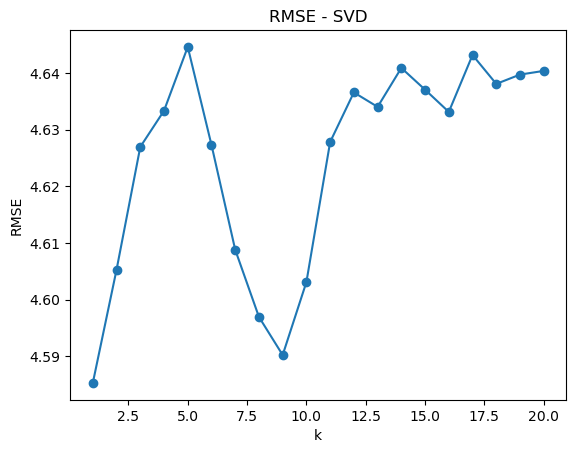

In [14]:
# Υπολογισμός RMSE για κάθε k από το 1 έως το 20
# Με παρόμοιο τρόπο θα εργαστούμε και εδώ, όπως παραπάνω
rmse_values = []
for k in range(1, K+1):
    U_k = U[:, :k]
    Sigma_k = np.diag(Sigma[:k])
    VT_k = VT[:k, :]
    
    predicted_ratings = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        # Από την γραμμική άλγεβρα γνωρίζουμε ότι έχει σημασία η σειρά με την οποία κάνουμε τις πράξεις,
        # και πρέπει να ξεκινήσουμε τους πολλαπλασιασμούς από το τελευταίο ζευγάρι
        R_K_i = np.dot(U_k[u, :], np.dot(Sigma_k, VT_k[:, c]))
        predicted_ratings.append(R_K_i)

    actual_ratings = test_data['overall'].values
    predicted_ratings = np.clip(predicted_ratings, 0, 5)

    svd_k_rmse = calculate_rmse(actual_ratings, predicted_ratings)
    rmse_values.append(svd_k_rmse)


# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με την βοήθεια της argsort
sorted_indices = np.argsort(rmse_values)

best_k = sorted_indices[0]+1
min_rmse = rmse_values[sorted_indices[0]]

print("το Βέλτιστο k:", best_k)
print("με Ελάχιστο RMSE [SVD]:", min_rmse)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k
plt.plot(range(1, K + 1), rmse_values, marker='o')
plt.title('RMSE - SVD')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Παρατηρούμε μία αυξομείωση στις τιμές του RMSE. Τοπικά ελάχιστα παρατηρούμε στο k=1 και k=9.</br>
Γενικά όμως βλέπουμε αρκετά κακιές προβλέψεις, η χειρότερη δυνατή πρόβλεψη που μπορούμε να έχουμε είναι το 5, και στο παράδειγμά μας εδώ οι προβλέψεις κυμαίνονται στο εύρος [~4.58,~4.645]. Αυτό είναι λογικό και αναμενόμενο, αφού στον σισδίαστατο πίνακα R που έχουμε φτιάξει `(κάθε γραμμή αντιστοιχή σε έναν ξεχωριστό χρήστη, κάθε στήλη αντιστοιχή σε ένα ξεχωριστό προιόν, και οι τιμές που περιέχει είναι οι βαθμολογίες για το κάθε ζευγάρι [χρήστη-προιόν], ώπου δεν είχαμε πληροφορία από τα δεδομένα μας, βάζαμε 0)`. Έτσι δημιουργήσαμε έναν αραιό πίνακα θεωρώντας τα μηδενικά αυτά χρήσιμη πληροφορία, με αποτέλεσμα να χρησιμοποιήση, ο αλγόριθμος SVD, αυτήν την "άχρηστη" πληροφορία στους υπολογισμούς του και να καταλήξει σε λανθασμένες προβλέψεις.

---
*Εδώ παρακάτω παρουσιάζουμε ένα μικρότερο και πιο στοχευμένο(για να βγει μικρότερο το RMSE) παράδειγμα για να ελέγξουμε την ορθότητα του αλγορίθμου που φτιάξαμε παραπάνω.*</br>
<span style="font-size: 12px;">*!δεν είναι υποχρεωτικό να το τρέξουμε!*</span>

In [15]:
train_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user1', 'user1', 'user2', 'user3', 'user3'],
    'asin': ['phone1', 'phone2', 'phone3', 'phone1', 'phone3', 'phone4'],
    'overall': [4, 5, 3, 3, 2, 4]
})

test_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user2', 'user3'],
    'asin': ['phone1', 'phone1', 'phone4'],
    'overall': [4, 3, 4]
})

print(train_data_2)
print()

# Κατασκευή αραιού πίνακα R
users_2 = train_data_2['reviewerID'].unique()
cellphones_2 = train_data_2['asin'].unique()

user_mapping_2 = {user_2: i for i, user_2 in enumerate(users_2)}
print(user_mapping_2)
cellphone_mapping_2 = {cellphone_2: i for i, cellphone_2 in enumerate(cellphones_2)}
print(cellphone_mapping_2)

num_users_2 = len(users_2)
num_cellphones_2 = len(cellphones_2)

R_2 = np.zeros((num_users_2, num_cellphones_2))

for index, row in train_data_2.iterrows():
    uu = user_mapping_2[row['reviewerID']]
    cc = cellphone_mapping_2[row['asin']]
    rating_2 = row['overall']
    R_2[uu, cc] = rating_2

# Εκτέλεση SVD για K_2 = 20
K_2 = 2
U_1, Sigma_1, VT_1 = np.linalg.svd(R_2)
print(U_1)
print(Sigma_1)
print(VT_1)
print()

# Υπολογισμός rank-20 approximation πίνακα
U_2 = U_1[:, :K_2]                # όλες τις γραμμές, τις 2 πρώτες στήλες
Sigma_2 = np.diag(Sigma_1[:K_2])  # τις πρώτες 2 τιμές της διαγωνίου
VT_2 = VT_1[:K_2, :]              # τις 2 πρώτες γραμμές, όλες τις στήλες
print(U_2)
print(Sigma_2)
print(VT_2)
print()

R_3 = np.dot(U_2, np.dot(Sigma_2, VT_2))

# "Clip" τις βαθμολογίες σε εύρος [0, 5]
R_3 = np.clip(R_3, 0, 5)

# Εκτύπωση του αρχικού πίνακα
print()
print("Initial (R_2):")
print(R_2)
print()

# Εκτύπωση του rank-20 approximation πίνακα
print("Rank-2 Approximation (R_3):")
print(R_3)

  reviewerID    asin  overall
0      user1  phone1        4
1      user1  phone2        5
2      user1  phone3        3
3      user2  phone1        3
4      user3  phone3        2
5      user3  phone4        4

{'user1': 0, 'user2': 1, 'user3': 2}
{'phone1': 0, 'phone2': 1, 'phone3': 2, 'phone4': 3}
[[ 0.95299042  0.13081439  0.27330725]
 [ 0.2528109   0.15392051 -0.95519376]
 [ 0.16702068 -0.97938556 -0.11361347]]
[7.36443735 4.38161992 2.35933665]
[[ 6.20603334e-01  6.47021881e-01  4.33571836e-01  9.07174150e-02]
 [ 2.24807059e-01  1.49276285e-01 -3.57476910e-01 -8.94085363e-01]
 [-7.51207886e-01  5.79203584e-01  2.51212478e-01 -1.92619345e-01]
 [-9.23838798e-17  4.72866244e-01 -7.88110406e-01  3.94055203e-01]]

[[ 0.95299042  0.13081439]
 [ 0.2528109   0.15392051]
 [ 0.16702068 -0.97938556]]
[[7.36443735 0.        ]
 [0.         4.38161992]]
[[ 0.62060333  0.64702188  0.43357184  0.09071742]
 [ 0.22480706  0.14927629 -0.35747691 -0.89408536]]


Initial (R_2):
[[4. 5. 3. 0.]
 [3. 0. 

In [16]:
predicted_ratings_2 = []

for index, row in test_data_2.iterrows():
    uuu = user_mapping_2[row['reviewerID']]
    ccc = cellphone_mapping_2[row['asin']]

    R_K_i_2 = np.dot(U_2[uuu, :], np.dot(Sigma_2, VT_2[:, ccc]))
    predicted_ratings_2.append(R_K_i_2)

actual_ratings_2 = test_data_2['overall'].values
print(actual_ratings_2)
print(predicted_ratings_2)

svd_2_rmse_2 = calculate_rmse(actual_ratings_2, np.array(predicted_ratings_2))
print("Prediction: ", svd_2_rmse_2)

[4 3 4]
[4.484396730288696, 1.307060137266091, 3.9483679176975146]
Prediction:  1.0170793877685222


*τέλος παραδείγματος*

---
<span style="font-size: 25px;">**Βήμα 4**</span>

In [17]:
def ucf_predict(user, item, R, k):
    # Βρίσκουμε τους χρήστες που έχουν βαθμολογήσει το αντικείμενο item
    users_rated_item = np.nonzero(R[:, item])[0]

    # Υπολογίζουμε την ομοιότητα
    user_similarity = cosine_similarity(R)
    u = user_similarity[user] # μας ενδιαφέρει αυτή η σειρά, που πρακτικά αντιστοιχεί στον user

    # Βρίσκουμε τους k πιο όμοιους χρήστες
    u_k = users_rated_item[np.argsort(u[users_rated_item])[-k:]]
    
    #print(np.sum(np.abs(user_similarity[user, u_k])))
    
    # Υπολογίζουμε την πρόβλεψη χρησιμοποιώντας την εξίσωση που μας δίνεται
    ar = np.sum(user_similarity[user, u_k] * R[u_k, item])
    par = np.sum(np.abs(user_similarity[user, u_k]))
    if par != 0:
        prediction = ar / par
    else:
        # Πρέπει να διακρίνουμε αυτήν την περίπτωση γιατι δεν γίνεται ο παρανομαστής να είναι =0
        # Αν όμως βρεθούμε σε αυτήν την περίπτωση
        # Τότε θα θέσουμε το 'prediction'=0
        # γιατί αυτό πρακτικά σημαίνει ότι ο user που εξετάζουμε,
        # δεν έχει κάνενα άλλο κοινό review με τους υπόλοιπους users(αυτούς που έχουν πάρει το αντικείμενο item)
        prediction = 0

    # Κάνουμε ένα clipping στο εύρος [0, 5] σε περίπτωση που χρειάζεται
    prediction = np.clip(prediction, 0, 5)

    return prediction

**Τον αραιό πίνακα R τον έχουμε υπολογίσει παραπάνω στο "Βήμα 3"</br>
Επειδή δεν έχουμε κάνει καμία αλλαγή πάνω σε αυτήν την μεταβλητή-πίνακα R,</br>
δεν θα τον ξανα υπολογίσουμε και θα τον χρησιμοποιήσουμε κατευθείαν**</br>
*(τον χρειαζόμαστε ως όρισμα στην κλίση της συνάρτησης "ucf_predict")*


το Βέλτιστο k: 20
με Ελάχιστο RMSE [UCF]: 0.9432925865043249


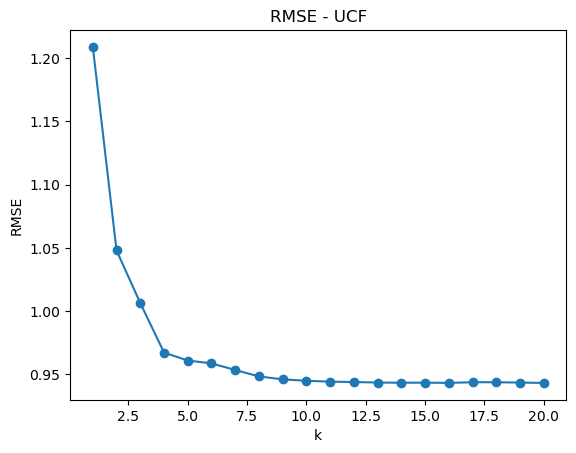

In [18]:
k_values = list(range(1, 21))
rmse_values_ucf = []

for k_value in k_values:
    predictions = []
    
    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = ucf_predict(u, c, R, k_value)
        predictions.append(prediction)

    actual_ratings = test_data['overall'].values

    rmse = calculate_rmse(actual_ratings, np.array(predictions))
    rmse_values_ucf.append(rmse)
    
# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με την βοήθεια της argsort
sorted_indices = np.argsort(rmse_values_ucf)

best_k = sorted_indices[0]+1
min_rmse_ucf = rmse_values_ucf[sorted_indices[0]]

print("το Βέλτιστο k:", best_k)
print("με Ελάχιστο RMSE [UCF]:", min_rmse_ucf)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k
plt.plot(k_values, rmse_values_ucf, marker='o')
plt.title('RMSE - UCF')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Παρατηρούμε μία αισθητή πτώση του RMSE. Πιο έντονη πτώση φαίνεται στην αρχή του γραφήματός μας, αλλά μετά από ένα διάστημα επέρχεται ισσοροπία. Αυτό σημαίνει ότι περίπου στο k=10, έχουμε φτάσει στο "όριο" και από εκεί και πέρα δεν θα βλέπουμε σημαντικές διαφορές, άρα δεν χρειάζεται να το τρέξουμε για μεγαλύτερες τιμές του k. Αυτό μπορεί να οφείλεται στο ότι τα δεδομένα μας έχουν μέχρι περίπου 10 όμοιους χρήστες που έχουν βαθμολογίσει το συγκεκριμένο αντικείμενο και από εκεί και πέρα μπαίνουμε στην περίπτωση όπου δεν μπορούμε να πάρουμε περισσότερους όμοιους χρήστες και αναγκαστικά τους παίρνουμε όλους(αλλά αυτοί θα είναι <~10 στις περισσότερες περιπτώσεις).

---
*Πάλι εδώ παρακάτω παρουσιάζουμε ένα μικρότερο παράδειγμα για να ελέγξουμε την ορθότητα του αλγορίθμου που φτιάξαμε παραπάνω, και να παρουσιάσουμε τον τρόπο σκέψης μου.</br>
Δεν είναι ολόκληρη η παραπάνω υλοποίηση, αλλά ένα αρχικό κομμάτι μόνο(γιατί το υπόλοιπο, ακολουθούσε μια παρόμοια λογική που είχαμε ακολουθήσει και στα παραπάνω βήματα)*</br>
<span style="font-size: 12px;">*!δεν είναι υποχρεωτικό να το τρέξουμε!*</span>

In [19]:
# Δημιουργία πλαισίου δεδομένων για το train set
train_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user1', 'user1', 'user2', 'user3', 'user3', 'user1'],
    'asin': ['phone1', 'phone2', 'phone3', 'phone1', 'phone1', 'phone3', 'phone4'],
    'overall': [4, 5, 3, 3, 2, 1, 4]
})

# Δημιουργία πλαισίου δεδομένων για το test set
test_data_2 = pd.DataFrame({
    'reviewerID': ['user1', 'user2', 'user3'],
    'asin': ['phone1', 'phone1', 'phone4'],
    'overall': [4, 3, 4]
})

print(train_data_2)
print()

# Κατασκευή αραιού πίνακα R
users_2 = train_data_2['reviewerID'].unique()
cellphones_2 = train_data_2['asin'].unique()

user_mapping_2 = {user_2: i for i, user_2 in enumerate(users_2)}
print(user_mapping_2)
cellphone_mapping_2 = {cellphone_2: i for i, cellphone_2 in enumerate(cellphones_2)}
print(cellphone_mapping_2)

num_users_2 = len(users_2)
num_cellphones_2 = len(cellphones_2)

R_2 = np.zeros((num_users_2, num_cellphones_2))

for index, row in train_data_2.iterrows():
    uu = user_mapping_2[row['reviewerID']]
    cc = cellphone_mapping_2[row['asin']]
    rating_2 = row['overall']
    R_2[uu, cc] = rating_2

# Εκτύπωση του αρχικού πίνακα
print()
print("Initial (R_2):")
print(R_2)
print()

  reviewerID    asin  overall
0      user1  phone1        4
1      user1  phone2        5
2      user1  phone3        3
3      user2  phone1        3
4      user3  phone1        2
5      user3  phone3        1
6      user1  phone4        4

{'user1': 0, 'user2': 1, 'user3': 2}
{'phone1': 0, 'phone2': 1, 'phone3': 2, 'phone4': 3}

Initial (R_2):
[[4. 5. 3. 4.]
 [3. 0. 0. 0.]
 [2. 0. 1. 0.]]



In [20]:
item_2=2#
# Βρίσκουμε τους χρήστες που έχουν βαθμολογήσει το αντικείμενο item_2
users_rated_item_2 = np.nonzero(R_2[:, item_2])[0]
print(users_rated_item_2)

user_2=1#
# Υπολογίζουμε την ομοιότητα
user_similarity_2 = cosine_similarity(R_2)
print(user_similarity_2)
uu = user_similarity_2[user_2] # mas endiaferei autos o user_2
print(uu)

k_2=2#
# Βρίσκουμε τους k_2 πιο όμοιους χρήστες
u_k_2 = uu[users_rated_item_2]
print(u_k_2)
print(np.argsort(uu[users_rated_item_2])[-k_2:])
print(users_rated_item_2[np.argsort(uu[users_rated_item_2])[-k_2:]])


[0 2]
[[1.         0.49236596 0.60553007]
 [0.49236596 1.         0.89442719]
 [0.60553007 0.89442719 1.        ]]
[0.49236596 1.         0.89442719]
[0.49236596 0.89442719]
[0 1]
[0 2]


*τέλος παραδείγματος*

---
<span style="font-size: 25px;">**Βήμα 5**</span>

Το Βέλτιστο k: 6
Με Ελάχιστο RMSE [ICF]: 0.9217044869514532


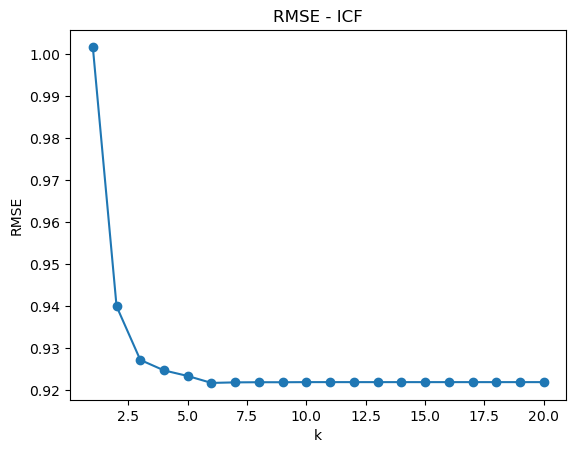

In [21]:
def icf_predict(user, item, R, k):
    # Βρίσκουμε τα αντικείμενα που έχει βαθμολογήσει ο χρήστης
    items_rated_by_user = np.nonzero(R[user, :])[0]

    # Υπολογίζουμε την ομοιότητα
    item_similarity = cosine_similarity(np.transpose(R))
    c = item_similarity[item]  # Μας ενδιαφέρει αυτή η σειρά, που πρακτικά αντιστοιχεί στο αντικείμενο

    # Βρίσκουμε τα k πιο όμοια αντικείμενα
    c_k = items_rated_by_user[np.argsort(c[items_rated_by_user])[-k:]]

    # Υπολογίζουμε την πρόβλεψη χρησιμοποιώντας την εξίσωση που μας δίνεται
    ar = np.sum(item_similarity[item, c_k] * R[user, c_k])
    par = np.sum(np.abs(item_similarity[item, c_k]))
    if par != 0:
        prediction = ar / par
    else:
        prediction = 0

    # Κάνουμε ένα clipping στο εύρος [0, 5] σε περίπτωση που χρειάζεται
    prediction = np.clip(prediction, 0, 5)

    return prediction

# Τρέξιμο του αλγορίθμου για k από 1 έως 20
k_values = list(range(1, 21))
rmse_values_icf = []

for k_value in k_values:
    predictions = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = icf_predict(u, c, R, k_value)
        predictions.append(prediction)

    actual_ratings = test_data['overall'].values

    rmse = calculate_rmse(actual_ratings, np.array(predictions))
    rmse_values_icf.append(rmse)

# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με τη βοήθεια της argsort
sorted_indices_icf = np.argsort(rmse_values_icf)

best_k_icf = sorted_indices_icf[0] + 1
min_rmse_icf = rmse_values_icf[sorted_indices_icf[0]]

print("Το Βέλτιστο k:", best_k_icf)
print("Με Ελάχιστο RMSE [ICF]:", min_rmse_icf)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k
plt.plot(k_values, rmse_values_icf, marker='o')
plt.title('RMSE - ICF')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Παρατηρούμε μία αισθητή πτώση του RMSE. Πιο έντονη πτώση φαίνεται στην αρχή του γραφήματός μας, αλλά μετά από ένα διάστημα επέρχεται ισσοροπία. Αυτό σημαίνει ότι περίπου στο k=6, έχουμε φτάσει στο "όριο" και από εκεί και πέρα δεν θα βλέπουμε σημαντικές διαφορές, άρα δεν χρειάζεται να το τρέξουμε για μεγαλύτερες τιμές του k. Αυτό οφείλεται για τον παρόμοιο λόγω που είπαμε και στον παραπάνω αλγόριθμο.

---
<span style="font-size: 25px;">**Βήμα 6**</span>

In [45]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

*! Διαρκεί περίπου 2-3 λεπτά για να τρέξει !*

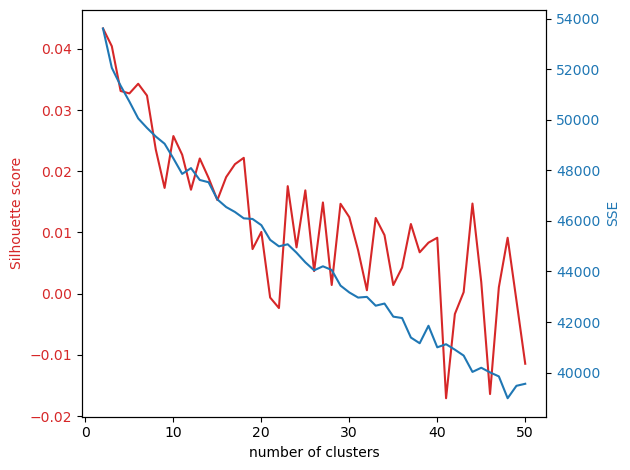

In [47]:
error = np.zeros(51)
sh_score = np.zeros(51)
for k in range(1,51):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    kmeans.fit_predict(R)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(R, kmeans.labels_)
        
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('Silhouette score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

`ΠΡΟΣΟΧΗ` οι τιμές αυτές θα αλλάζουν κάθε φορά που τρέχουμε το παραπάνω πρόγραμμα. Αυτό είναι λογικό και αναμενόμενο αφού ο k-means κάθε φορά που τρέχει θα καταλήξει με λίγο διαφορετικά αποτελέσματα, αφού η αρχικοποίηση των κέντρων γίνεται τυχαία και σε διαφορετικά σημεία κάθε φορά.</br></br>
**Από το παραπάνω γράφημα, μπορούμε να πούμε ότι ένας "σωστός" αριθμός από clusters είναι ο 18.**</br>
άλλοι σχτικά "σωστοί" αριθμοί φαίνονται να είναι οι: 29, 32, 36, 40, 36, **44** και **49**.</br>
Καταλήξαμε όμως σε αυτόν τον αριθμό *[k=18]* γιατί σε εκείνο το σημείο:
1. <span style="color: #C30010;">στο Silhouette score παρατηρούμε ένα έντονο peak *[κυρίως αυτό]*</span>
2. <span style="color: #006CA5;">στο SSE παρατηρούμε μια τιμή που έχει μειωθεί αισθητά</span>

In [48]:
def cluster_average(user, item, R, cluster_labels):
    # Βρίσκουμε το cluster στο οποίο ανήκει ο χρήστης
    user_cluster = cluster_labels[user]
    
    # Βρίσκουμε τα indices των χρηστών που ανήκουν στο ίδιο cluster με τον χρήστη user
    users_in_cluster = np.where(cluster_labels == user_cluster)[0] #g [από τις οδηγίες του pdf που μας δόθηκαν]
    
    # Βρίσκουμε τους χρήστες που έχουν βαθμολογήσει το συγκεκριμένο αντικείμενο item
    users_rated_item = np.nonzero(R[:, item])[0]

    # Βρίσκουμε τους χρήστες που ανήκουν στο ίδιο cluster ΚΑΙ έχουν βαθμολογήσει το αντικείμενο item
    users_rated_item_in_cluster = np.intersect1d(users_in_cluster, users_rated_item)
    
    if len(users_rated_item_in_cluster) > 0:
        # Υπολογισμός μέσης τιμής των βαθμολογιών για το αντικείμενο item από τους χρήστες του cluster που έχουν βαθμολογίσει αυτό το item
        cluster_avg_item_rating = np.mean(R[users_rated_item_in_cluster, item]) #R(g,c) [από τις οδηγίες του pdf που μας δόθηκαν]
        return cluster_avg_item_rating #R(g,c)
    else:
        # Αν δεν υπάρχουν βαθμολογίες για το αντικείμενο item στο cluster τότε
        # Υπολογίζουμε την μέση τιμή των βαθμολογιών για όλα τα αντικείμενα από τους χρήστες του cluster
        # χρήστες του cluster(=δεν θα λάβουμε υπόψην μας τους users που δεν εχουν βαθμολογίσει κάποιο item [δηλ. με 0 rating]
        # [΄΄΄έχουμε κάνει την σύμβαση ότι όπου rating=0 σημαίνει ότιο user δεν έxει κάνει review, και όχι ότι έχει κάνει κακό  review βάζοντας βαθμολογία 0]
        # ΠΡΟΣΟΧΗ!!! η παραπάνω σύμβση έχει γίνει και στα προηγούμενα βήματα !!!
        cluster_avg_rating = np.mean(R[users_in_cluster, :][R[users_in_cluster, :] > 0]) #R(g) [από τις οδηγίες του pdf που μας δόθηκαν]
        return cluster_avg_rating #R(g)


In [50]:
# Επιλογή του "σωστού" αριθμού clusters
optimal_k = 18

# Εκπαίδευση του k-means μοντέλου με τον βέλτιστο αριθμό clusters
best_kmeans_model = sk_cluster.KMeans(init='k-means++', n_clusters=optimal_k)
cluster_labels = best_kmeans_model.fit_predict(R)

# Εφαρμογή του Cluster-Average (CA) αλγορίθμου
predictions_ca = []

for index, row in test_data.iterrows():
    u = user_mapping[row['reviewerID']]
    c = cellphone_mapping[row['asin']]
    
    prediction = cluster_average(u, c, R, cluster_labels)
    predictions_ca.append(prediction)

# Υπολογισμός RMSE για τον Cluster-Average (CA) αλγόριθμο
actual_ratings = test_data['overall'].values
rmse_ca = calculate_rmse(actual_ratings, np.array(predictions_ca))

print("Βέλτιστος αριθμός clusters:", optimal_k)
print("RMSE [CA]:", rmse_ca)


Βέλτιστος αριθμός clusters: 18
RMSE [CA]: 0.7800935763473554


`ΠΡΟΣΟΧΗ` και αυτή εδώ η τιμή θα αλλάζει κάθε φορά που τρέχουμε το παραπάνω πρόγραμμαν, πάλι για τον ίδιο λόγω.

**Εκτός από το  να εξετάσουμε μόνο την πρόβλεψη για k=18 ("σωστός" # clusters),</br>
παρακάτω θα δοκιμάσουμε και άλλες τιμές του 𝑘 *[=από 2 έως 60]* για να δούμε αν μπορούμε να βελτιώσουμε την απόδοση του αλγορίθμου.**</br>
</br>
*! Διαρκεί περίπου 2-3 λεπτά για να τρέξει όλο αυτό, γιατί έχουμε βάλει ένα αρκετά μεγάλο εύρος για τις k τιμές, σε συνδιασμό ότι σε κάθε διαφορετικό k τρέχει το k-means και υπολογίζει και τις μέσες τιμές !*

Βέλτιστος αριθμός clusters: 46
Ελάχιστο RMSE [CA]: 0.5882835576031508


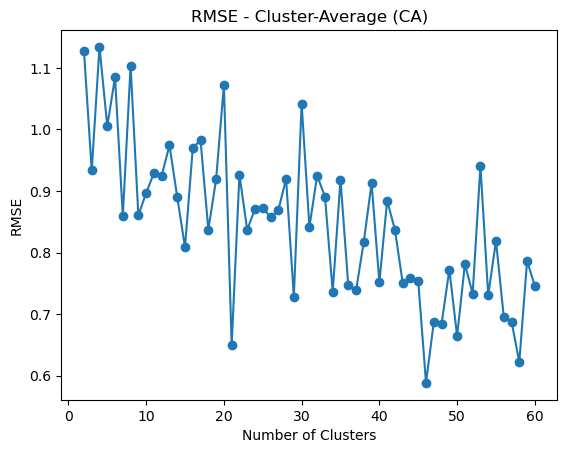

In [56]:
# Δοκιμή διαφορετικών τιμών για τον αριθμό των clusters
k_values_additional = list(range(2, 61))
rmse_values_ca_additional = []
actual_ratings = test_data['overall'].values

for k in range(2, 61):
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average(u, c, R, additional_cluster_labels)
        predictions_ca_additional.append(prediction)

    # Υπολογισμός RMSE για τον Cluster-Average (CA) αλγόριθμο
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ca_additional.append(rmse_ca_additional)
    
# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με τη βοήθεια της argsort
sorted_indices_clusters = np.argsort(rmse_values_ca_additional)

best_k_clusters = sorted_indices_clusters[0]+2
min_rmse_clusters = rmse_values_ca_additional[sorted_indices_clusters[0]]

print("Βέλτιστος αριθμός clusters:", best_k_clusters)
print("Ελάχιστο RMSE [CA]:", min_rmse_clusters)

# Σχεδίαση γραφικής παράστασης RMSE ως προς τον αριθμό των clusters
plt.plot(k_values_additional, rmse_values_ca_additional, marker='o')
plt.title('RMSE - Cluster-Average (CA)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()


`ΠΡΟΣΟΧΗ` οι τιμές αυτές θα αλλάζουν και εδώ κάθε φορά που τρέχουμε το παραπάνω πρόγραμμα, πάλι για τον ίδιο λόγω.</br></br>
**Στο εύρος 2 έως 50(ένα κομμάτι από το παλιό μας εύρος) παρατηρούμε ότι τελικά πιο "σωστό" k για αριθμό cluster είναι το 46, αφού εκεί παρατηρείται το πιο χαμηλό RMSE.**</br>
Αυτό είναι αναμενόμενο, να μην βγει ξανα "σωστή" τιμή το 18, γιατί ξανα τρέξαμε τον k-means και όπως είναι γμωστό ο k-means κάθε φορά παίρνει διαφρετικές αρχικοποιήσεις κέντρων, που αυτό καταλήγει σε διαφορετικά αποτελέσματα, όπως έχουμε ξανα αναφέρει και πιο πάνω.</br></br>
**Επίσης παρατηρούμε ότι στο καινούργιο μας εύρος(51-60) (αλλά και γενικά) ότι έχουμε μια μικρή 'μέση' πτώση στις τιμές για το RMSE. Βάζουμε τον όρο 'μέση' πτώση γιατί στην γραφική μας παράσταση παρατηρούνται συνεχείς ανόδους και καθόδους(σαν 'καρδιογράφημα'). Αυτό είναι λογικό, αφού ο k-meas λειτουργεί αρκετά τυχαία κάθε φορά(δηλ. κάθε φορά που τον τρέχουμε, που στην περίπτωσή μας τον καλούμε κάθε φορά που θέλουμε να αλλάξουμε τον αριθμό από clusters)</br>
ΑΡΑ, εκεί που θέλω να καταλήξω είναι ότι αν τρέξουμε αυτό το πρόβλημα αρκετές φορές και υπολογίσουμε τον μέσο όρο, με βάση τον αριθμό από cluster, τότε ίσως δούμε μία μικρή πτώση στις τιμές του RMSE.</br></br>**
Αυτή η λογική ισχύει και για τα επόμενα γραφήματα που θα δούμε στο κομμάτι του 'bonus'.

---
<span style="font-size: 20px;">**Bonus**</span></br></br>
Εδώ αντί να εφαρμόσουμε τον αλγόριθμο που αφορούσε την `Μέση Τιμή`, θα εφαρμόσουμε τον αλγόριθμο `UCF`. Θα εργαστούμε με την ίδια λογική που εργαστήκαμε και στην παραπάνω υλοποίηση αλλά και στην υλοποίηση του **Βήματος 4**.</br></br>
*! Διαρκεί και αυτό περίπου 2-3 λεπτά το κάθε block(εκτός από το 1ο) για να τρέξει !*</br></br>
Θα το τρέξουμε για τρεις διαφορτικές περιπτώσεις ομοιότητας (για **k=5**<span style="font-size: 10px;">(στο 2ο block)</span>, **k=2**<span style="font-size: 10px;">(στο 3ο block)</span>, **k=10**<span style="font-size: 10px;">(στο 4ο block)</span>)

In [38]:
def cluster_average_ucf(user, item, R, cluster_labels, k):
    
    # ............. ΤΟ ΚΟΜΜΑΤΙ ΑΠΟ ΤΟ "ΒΗΜΑ 6" ΠΟΥ ΥΛΟΠΟΙΗΣΑΜΕ ΠΑΡΑΠΝΩ ............. #
    
    # Βρίσκουμε το cluster στο οποίο ανήκει ο χρήστης
    user_cluster = cluster_labels[user]
    
    # Βρίσκουμε τα indices των χρηστών που ανήκουν στο ίδιο cluster με τον χρήστη user
    users_in_cluster = np.where(cluster_labels == user_cluster)[0] #g [από τις οδηγίες του pdf που μας δόθηκαν]
    
    # Βρίσκουμε τους χρήστες που έχουν βαθμολογήσει το συγκεκριμένο αντικείμενο item
    users_rated_item = np.nonzero(R[:, item])[0]

    # Βρίσκουμε τους χρήστες που ανήκουν στο ίδιο cluster ΚΑΙ έχουν βαθμολογήσει το αντικείμενο item
    users_rated_item_in_cluster = np.intersect1d(users_in_cluster, users_rated_item)
    
    if len(users_rated_item_in_cluster) > 0:
        # Υπολογισμός μέσης τιμής των βαθμολογιών για το αντικείμενο item από τους χρήστες του cluster που έχουν βαθμολογίσει αυτό το item
        cluster_avg_item_rating = np.mean(R[users_rated_item_in_cluster, item]) #R(g,c) [από τις οδηγίες του pdf που μας δόθηκαν]
        
    else:
        # Αν δεν υπάρχουν βαθμολογίες για το αντικείμενο item στο cluster τότε
        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # Στο pdf δεν μας λέει ακριβώς πως να χειριστούμε αυτήν την περίπτωση,
        # άρα δεν ξέρω αν είναι πολύ σωστή αυτή η απόφαση, αλλά βγάζει νόημα
        # μπορούμε να βάλουμε κάτι τέτοιο "cluster_avg_item_rating = 0" αν δεν θέλουμε αυτό
        # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        cluster_avg_item_rating = np.mean(R[users_in_cluster, :][R[users_in_cluster, :] > 0]) #R(g) [από τις οδηγίες του pdf που μας δόθηκαν]
        
        
    # ............. ΠΕΡΙΠΟΥ ΤΟ ΚΟΜΜΑΤΙ ΑΠΟ ΤΟ "ΒΗΜΑ 4" ΠΟΥ ΥΛΟΠΟΙΗΣΑΜΕ ΤΟ UCF ............. #
    
    # Υπολογισμός ομοιότητας μεταξύ του χρήστη user και των clusters
    user_similarity = cosine_similarity(R[user, np.newaxis], R[users_in_cluster, :])[0]

    # Επιλογή των k πιο όμοιων clusters
    top_k_clusters = np.argsort(user_similarity)[-k:]

    # Υπολογισμός της πρόβλεψης χρησιμοποιώντας την εξίσωση του UCF για τα επιλεγμένα clusters
    # αντί να το πολλαπλασιάζαμε με το κανονικό R[u',c] όπως στην παλιά μας εξίσωση,
    # τώρα το πολλαπλασιάζουμε με αυτό που είχαμε βρει στο "Βήμα 6", το R[g,c]
    ar = np.sum(user_similarity[top_k_clusters] * cluster_avg_item_rating)
    par = np.sum(np.abs(user_similarity[top_k_clusters]))

    if par != 0:
        prediction = ar / par
    else:
        prediction = 0

    # Κάνουμε ένα clipping στο εύρος [0, 5] σε περίπτωση που χρειάζεται
    prediction = np.clip(prediction, 0, 5)

    return prediction

Βέλτιστος αριθμός clusters: 55
Ελάχιστο RMSE [CUCF]: 0.582023080399945


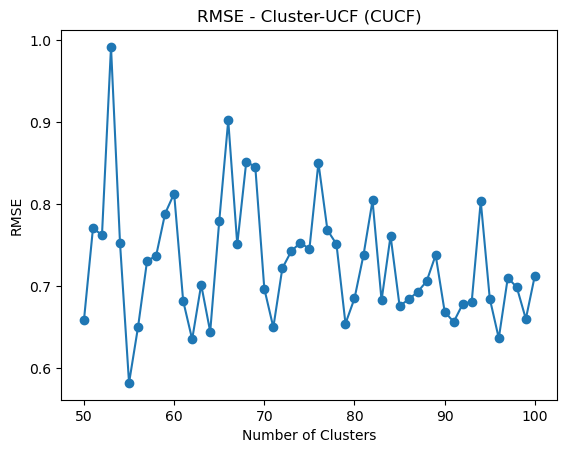

In [57]:
# Εφαρμογή του UCF αλγορίθμου με τη χρήση του cluster-item πίνακα για διάφορες τιμές του k από 50 έως 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# Κρατάμε τα 5 πιο όμοια ζευγάρια user-cluster
K_num_of_same_users = 5 #(αλλάζοντας αυτήν την μεταβλητή μπορούμε να αλλάξουμε το πόσα όμοια ζευγάρια παίρνουμε)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Υπολογισμός RMSE για τον Cluster-Average-UCF (CAUCF) αλγόριθμο
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με τη βοήθεια της argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("Βέλτιστος αριθμός clusters:", best_k_ucf_clusters)
print("Ελάχιστο RMSE [CUCF]:", min_rmse_ucf_clusters)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k για τον UCF αλγόριθμο με χρήση cluster-item πίνακα
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`ΠΡΟΣΟΧΗ` οι τιμές αυτές θα αλλάζουν και εδώ κάθε φορά που τρέχουμε το παραπάνω πρόγραμμα, πάλι για τον ίδιο λόγω.</br></br>
*Κρατάμε τα **5** πιο όμοια ζευγάρια user-cluster*</br></br>
**Στο εύρως [50-100] που εξετάζουμε, παρατηρούμε ότι η μικρότερη τιμή για το RMSE είναι στο 55.**</br>
**Γενικά όσο ο αριθμός τον clusters αυξάνεται, βλέπουμε να έχει επέλθει μία ισσοροπία, με ίσως μια μικρή πτώση στον μέσο όρο των τιμών, όμως σε καμία περίπτωση δεν μπορούμε να μιλήσουμε για κάποια σταθερή πορεία των τιμών του RMSE καθώς αυξάνουμε τον αριθμό των clusters.**</br>
Όταν λέω ισσοροπία δεν εννοώ ότι βλέπω μια ευθεία γραμμή πααράλληλη με τον x'x, αλλά βλέπω τις τιμές να είναι γύρω από το ~0.7.</br>
Αν βάλουμε άλλες τιμές στην μεταβλητή *K_num_of_same_users* μπορεί να έρθουμε αντιμέτωποι με άλλες τιμές.</br>

Βέλτιστος αριθμός clusters: 84
Ελάχιστο RMSE [CUCF]: 0.587540860173646


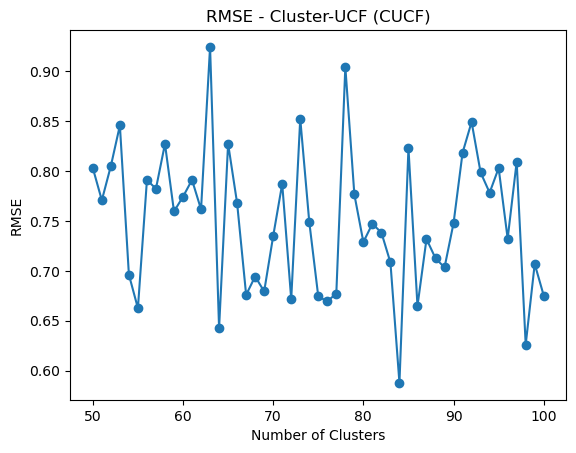

In [58]:
# Εφαρμογή του UCF αλγορίθμου με τη χρήση του cluster-item πίνακα για διάφορες τιμές του k από 50 έως 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# Κρατάμε τα 2 πιο όμοια ζευγάρια user-cluster
K_num_of_same_users = 2 #(αλλάζοντας αυτήν την μεταβλητή μπορούμε να αλλάξουμε το πόσα όμοια ζευγάρια παίρνουμε)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Υπολογισμός RMSE για τον Cluster-Average-UCF (CAUCF) αλγόριθμο
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με τη βοήθεια της argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("Βέλτιστος αριθμός clusters:", best_k_ucf_clusters)
print("Ελάχιστο RMSE [CUCF]:", min_rmse_ucf_clusters)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k για τον UCF αλγόριθμο με χρήση cluster-item πίνακα
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`ΠΡΟΣΟΧΗ` οι τιμές αυτές θα αλλάζουν και εδώ κάθε φορά που τρέχουμε το παραπάνω πρόγραμμα, πάλι για τον ίδιο λόγω.</br></br>
*Κρατάμε τα **2** πιο όμοια ζευγάρια user-cluster*</br></br>
**Στο εύρως [50-100] που εξετάζουμε, παρατηρούμε ότι η μικρότερη τιμή για το RMSE είναι στο 84.**</br>
**Και εδώ μοιάζει πως όσο ο αριθμός τον clusters αυξάνεται, μειώνεται λίγο κατά μέσο όρο το RMSE. Αλλά πάλι εννοείται δεν βλέπουμε μια σταθερή πορεία, αλλά βλέπουμε συνεχείς αλλαγές του γραφήματος με συνεχέις ανοδικές και καθοδικές κατευθύνσεις**</br>

Βέλτιστος αριθμός clusters: 81
Ελάχιστο RMSE [CUCF]: 0.5818488410480259


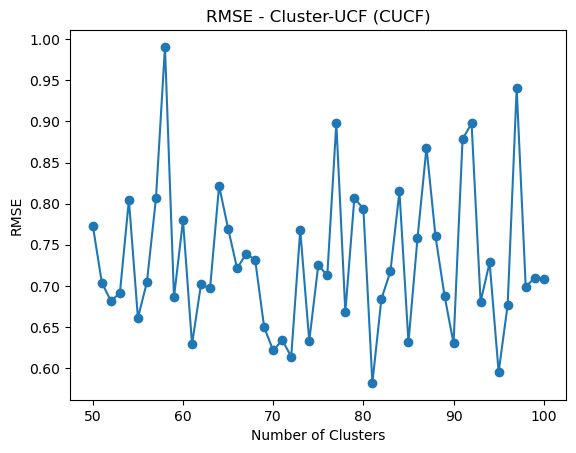

In [59]:
# Εφαρμογή του UCF αλγορίθμου με τη χρήση του cluster-item πίνακα για διάφορες τιμές του k από 50 έως 100
k_values_ucf_clusters = list(range(50, 101))
rmse_values_ucf_clusters = []
actual_ratings = test_data['overall'].values

# Κρατάμε τα 10 πιο όμοια ζευγάρια user-cluster
K_num_of_same_users = 10 #(αλλάζοντας αυτήν την μεταβλητή μπορούμε να αλλάξουμε το πόσα όμοια ζευγάρια παίρνουμε)

for k in k_values_ucf_clusters:
    kmeans_model_additional = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    additional_cluster_labels = kmeans_model_additional.fit_predict(R)
    
    predictions_ca_additional = []

    for index, row in test_data.iterrows():
        u = user_mapping[row['reviewerID']]
        c = cellphone_mapping[row['asin']]

        prediction = cluster_average_ucf(u, c, R, additional_cluster_labels, K_num_of_same_users)
        predictions_ca_additional.append(prediction)

    # Υπολογισμός RMSE για τον Cluster-Average-UCF (CAUCF) αλγόριθμο
    rmse_ca_additional = calculate_rmse(actual_ratings, np.array(predictions_ca_additional))
    rmse_values_ucf_clusters.append(rmse_ca_additional)

# Βρίσκουμε το k που αντιστοιχεί στο ελάχιστο RMSE με τη βοήθεια της argsort
sorted_indices_ucf_clusters = np.argsort(rmse_values_ucf_clusters)

best_k_ucf_clusters = sorted_indices_ucf_clusters[0]+50
min_rmse_ucf_clusters = rmse_values_ucf_clusters[sorted_indices_ucf_clusters[0]]

print("Βέλτιστος αριθμός clusters:", best_k_ucf_clusters)
print("Ελάχιστο RMSE [CUCF]:", min_rmse_ucf_clusters)

# Σχεδίαση γραφικής παράστασης RMSE ως προς το k για τον UCF αλγόριθμο με χρήση cluster-item πίνακα
plt.plot(k_values_ucf_clusters, rmse_values_ucf_clusters, marker='o')
plt.title('RMSE - Cluster-UCF (CUCF)')
plt.xlabel('Number of Clusters')
plt.ylabel('RMSE')
plt.show()

`ΠΡΟΣΟΧΗ` οι τιμές αυτές θα αλλάζουν και εδώ κάθε φορά που τρέχουμε το παραπάνω πρόγραμμα, πάλι για τον ίδιο λόγω.</br></br>
*Κρατάμε τα **10** πιο όμοια ζευγάρια user-cluster*</br></br>
**Παρατηρούμε παρόμοια πράγματα με τα παραπάνω.**</br></br>
Από εδώ τυχαίνει να παίρνουμε το μικρότερο RMSE για τον αλγόριθμο **CUCF**!

---
<span style="font-size: 25px;">**Βήμα 7**</span>

**Έχουμε συγκεντώσει σε έναν πίνακα, όλα τα καλύτερα RMSE αποτελέσματα που έβγαλε ο κάθε αλγόριθμος που υλοποιήσαμε:**

| Αλγόριθμος                                           | Καλύτερο RMSE       |
|------------------------------------------------------|---------------------|
| User Agerage **(UA)**                                | 0.5397865558697561  |
| Item Average **(IA)**                                | 0.5138120657943773  |
| Singular Value Decomposition **(SVD)**               | 4.585271738477795   |
| UserBased Collaborative Filtering **(UCF)**          | 0.9432925865043249  |
| ItemBased Collaborative Filtering **(ICF)**          | 0.9217044869514532  |
| Cluster-Average **(CA)**                             | 0.5882835576031508  |
| Cluster-UserBased Collaborative Filtering **(CUCF)** | 0.5818488410480259  |

**Παρακάτω, για λόγους καλύτερης οπτικοποίησης, παρουσιάζεται και ένα διάγραμμα που έχουμε όλους τους αλγόριθμους που υλοποιήσαμε, ταξινομημένους κατα αύξοντα αριθμό σε σχέση με το μικρόρτερο RMSE που είχαν.**

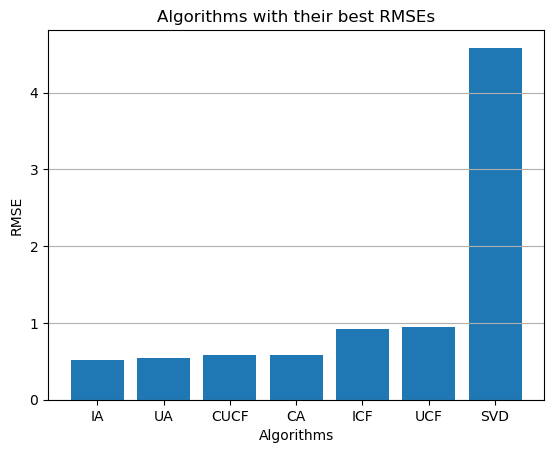

In [60]:
import matplotlib.pyplot as plt

algorithms = ['UA', 'IA', 'SVD', 'UCF', 'ICF', 'CA', 'CUCF']
RMSE = [0.5397865558697561, 0.5138120657943773, 4.585271738477795, 0.9432925865043249, 0.9217044869514532, 0.5882835576031508, 0.5818488410480259]

# Φτιάχνουμε την σειρά, από τον αλγόριθμο με το μικρότερο RMSE προς το μεγαλύτερο
sorted_indices = sorted(range(len(RMSE)), key=lambda k: RMSE[k])
sorted_algorithms = [algorithms[i] for i in sorted_indices]
sorted_RMSE = [RMSE[i] for i in sorted_indices]

plt.bar(sorted_algorithms, sorted_RMSE)

plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('Algorithms with their best RMSEs')
plt.grid(axis='y')
plt.show()


<span style="font-size: 19px;">**ΠΑΡΑΤΗΡΙΣΕΙΣ**</span></br>

---

Διακρίνουμε 3 μεγάλες κατηγορίες αποτελεσμάτων των αλγορίθμων:</br>
* <span style="font-size: 16px;">οι αλγόριθμοι που είχαν **<u>καλή</u>** προσέγκιση (RMSE < 1) και αυτοί οι αλγόριθμοι είναι οι:</span></br>
</br> `Item Average (IA)` : ο αλγόριθμος με τα καλύτερα αποτελέσματα. Ένας απλός αλγόριθμος, χωρίς ιδιαίτερη πολυπλοκότητα, που εκμεταλέβεται τον μέσο όρο των αξιολογίσεων που έχει λάβει κάθε αντικείμνο. </br>
</br> `User Agerage (UA)` : ένας αλγόριθμος ίδιας φιλοσοφίας με τον (IA). Η διαφορά του είναι ότι αυτός εκμεταλέβεται τον μέσο όρο των αξιολογίσεων που έχει κάνει ο κάθε χρήστης.</br>
</br>Ήταν πιθανό ο αλγόριθμος (IA) να έχει λίγο μικρότερη τιμή από τον (UA), αφού οι αξιολογίσεις που έχει κάνει ο εκάστοτε χρήστης επιρρεάζονται άμεσα από το αντικείμνο που βαθμολογεί, και όχι τόσο πολύ από τον "χαρακτήρα" του χρήστη. Δηλαδή η μέση τιμή ευνοεί λίγο περισσότερο το αντικείμενο, αφού στην τελική αυτό αξιολογούμε.</br>
</br> `Cluster-UserBased Collaborative Filtering (CUCF)` : είναι περίπου ο συνδιασμός των αλγορίθμων (CA) και (UCF). Δηλαδή, συνδιάζει τα πλεονεκτήματα της ομαδοποίησης από τον (CA) με τα πλεονεκτήματα της σύγκρισης της ομοιότητας (UCF), και βλέπουμε ότι λειτουργεί λίγο καλύτερα από τον (CA) και αρκετά καλύτερα από τον (UCF).</br>
</br> `Cluster-Average (CA)` : ο αλγόριθμος που μέσα από τον διαχωρισμό των χρηστών σε ομάδες, πετυχαίνει τίμια αποτελέσματα.Πιο συγκεκριμένα, οι ομάδες αυτές αποτελούνται από χρήστες με παρόμοια χαρακτηριστικά-αξιολογίσιες, δηλ. με παρόμοιες προτιμήσεις, και άρα ο μέσος όρος της αξιολόγησης ενός αντικειμένου από αυτήν την ομάδα χρηστών, μπορεί να αποτελέσει μία καλή πρόβλεψη.</br>
</br>Αυτοί οι δύο αλγόριθμοι, ο (CUCF) και ο (CA), δεν μπορούμε να πούμε ότι έχουν πολύ μεγάλη διαφορά στα αποτελέσματα του RMSE. Αυτό οφείλεται και σε έναν μεγάλο βαθμό, στις πολλές παραμέτρους που μπορεί να πάρει το καθένα, αλλά ειδικά ο (CUCF) που έχει την παράμετρο για το πόσα πίο όμοια θέλουμε να κρατήσουμε, και δεν μπορούν να ελεγνχτούν όλες οι περιπτώσεις.</br>
</br> `ItemBased Collaborative Filtering (ICF)` : είναι ένας αλγόριθμος που εξετάζει την ομοιότητα μεταξύ των αντικειμένων. Όχι όμως όλων των αντικειμένων κάθε φορά, αλλά ένα υποσύνολο με τα αντικείμενα που έχουν αξιολογηθεί(θα το αναλύσουμε παρακάτω στο UCF).</br>
</br> `UserBased Collaborative Filtering (UCF)` : ένας αλγόριθμος ίδιας φιλοσοφίας με τον (ICF). Η διαφορά του είναι ότι αυτός εξετάζει την ομοιότητα μεταξύ των χρηστών.</br>
Αξίζει να σημειωθεί ότι στον (UCF), ο χρήστης θα εξετάσει την ομοιότητά του μόνο με βάση τους άλλους χρήστες που έχουν βαθμολογίσει το συγκεκριμένο αντικείμενο, και δεν θα λάβει υπόψην του τους χρήστες που δεν έχουν βαθμολογίσει το ίδιο αντικείμενο(αλλά θα μπορούσε να είχε μια καλή ομοιότητα βλέποντας και τις άλλες αξιολογίσεις των υπόλοιπων αντικειμένων)(εδώ πάλι βάζουμε περισσότερο το κριτίριο ταιριάσματος "γούστου" ανάμεσα στους χρήστες και όχι τόσο πολύ την "ποιότητα" του εκάστοτε αντικειμένου που εξετάζουμε κάθε φορά). Αυτό προκαλεί ένα φιλτράρισμα και έχει ως αποτέλεσμα να έχουμε πολύ καλύτερες προβλέψεις στις περισσότερες περιπτώσεις, αλλά μπορεί σε κάποιες ειδικές περιπτώσεις να χάνουμε κάποιες καλές ομοιότητες και κατ' επέκταση κάποιες καλές προβλέψεις. Παρόμοια διαδικασία κάνει και ο (ICF) αλλά αυτός επικεντρώνεται στα προιόντα.</br>
</br>Ήταν πιθανό ο αλγόριθμος (ICF) να έχει λίγο μικρότερη τιμή από τον (UCF), πάλι για παρόμοια λογική που είχαμε δει και στην σύγκριση (IA)-(UA). Ο (UCF) προσπαθεί να βρει όμοιους χρήστες που έχουν παρόμοιο "γούστο" βλέποντας τον γενικό τρόπο που αξιολογεί ένας χρήστης με έναν άλλο, αλλά αυτό δεν είναι αντιπροσωπευτικό για την αντικειμενική αξιολόγιση του αντικειμένου.</br>

</br>

---

* <span style="font-size: 16px;">οι αλγόριθμοι που είχαν **<u>κακή</u>** προσέγκιση (RMSE > 4.5) και αυτός ο αλγόριθμος είναι ο:</span></br>
</br> `Singular Value Decomposition (SVD)` : ο αλγόριθμος με τα χειρότερα αποτελέσματα. Αυτό είναι λογικό αφού ο πίνακας R που φτιάξαμε είναι ένας αραιός πίνακας, δηλαδή είναι ένας πίνακας με πολλές μηδενικές τιμές. Αυτές οι τιμές δεν είναι βαθμολογίες χρηστών για κάποιο αντικείμενο, αλλά ο αλγόριθμός μας τις βλέπει ως αξιολογίσεις και γι' αυτόν τον λόγω καταλήγει σε λανθασμένες προβλέψεις.